<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_3_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n250.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.150398,34.126947,63.971422,-0.000215,169.248552,169.250123,-0.001571
1,0.0,1.0,70.593977,54.505794,23.772992,-0.001204,158.871558,158.872085,-0.000527
2,0.0,2.0,31.303182,30.178272,35.858769,-0.006995,107.333229,107.341735,-0.008507
3,0.0,3.0,21.768708,73.913483,46.033813,-0.000176,151.715829,151.716358,-0.000530
4,0.0,4.0,45.304602,71.442391,94.033085,0.000524,220.780602,220.781183,-0.000581
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,69.872726,75.933414,24.450954,-0.000079,180.257015,180.257384,-0.000369
59996,999.0,56.0,44.394426,82.181525,94.196274,0.000754,230.772979,230.771851,0.001128
59997,999.0,57.0,94.355252,39.297888,99.024609,-0.004937,242.672812,242.677091,-0.004279
59998,999.0,58.0,74.332324,42.911546,75.088792,0.002068,202.334730,202.332356,0.002374


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.150398,34.126947,63.971422,-0.000215,169.248552,169.250123,-0.001571
1,0.0,1.0,70.593977,54.505794,23.772992,-0.001204,158.871558,158.872085,-0.000527
2,0.0,2.0,31.303182,30.178272,35.858769,-0.006995,107.333229,107.341735,-0.008507
3,0.0,3.0,21.768708,73.913483,46.033813,-0.000176,151.715829,151.716358,-0.000530
4,0.0,4.0,45.304602,71.442391,94.033085,0.000524,220.780602,220.781183,-0.000581
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,69.872726,75.933414,24.450954,-0.000079,180.257015,180.257384,-0.000369
59996,999.0,56.0,44.394426,82.181525,94.196274,0.000754,230.772979,230.771851,0.001128
59997,999.0,57.0,94.355252,39.297888,99.024609,-0.004937,242.672812,242.677091,-0.004279
59998,999.0,58.0,74.332324,42.911546,75.088792,0.002068,202.334730,202.332356,0.002374


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    61.150398  34.126947  63.971422 -0.000215  169.248552   
      1.0    70.593977  54.505794  23.772992 -0.001204  158.871558   
      2.0    31.303182  30.178272  35.858769 -0.006995  107.333229   
      3.0    21.768708  73.913483  46.033813 -0.000176  151.715829   
      4.0    45.304602  71.442391  94.033085  0.000524  220.780602   
...                ...        ...        ...       ...         ...   
999.0 55.0   69.872726  75.933414  24.450954 -0.000079  180.257015   
      56.0   44.394426  82.181525  94.196274  0.000754  230.772979   
      57.0   94.355252  39.297888  99.024609 -0.004937  242.672812   
      58.0   74.332324  42.911546  75.088792  0.002068  202.334730   
      59.0   40.507090  21.825398  28.949888 -0.006038  101.276338   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    169.250123 -0.001571  
      1.0    158.872085 -0.000527  
      2.0    107.341735 -0.008507  
      3.0    151.716358 -0.000530  
      4.0    220.781183 -0.000581  
...                 ...       ...  
999.0 55.0   180.257384 -0.000369  
      56.0   230.771851  0.001128  
      57.0   242.677091 -0.004279  
      58.0   202.332356  0.002374  
      59.0   101.282714 -0.006376  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    61.150398  34.126947  63.971422 -0.000215  169.248552   
      1.0    70.593977  54.505794  23.772992 -0.001204  158.871558   
      2.0    31.303182  30.178272  35.858769 -0.006995  107.333229   
      3.0    21.768708  73.913483  46.033813 -0.000176  151.715829   
      4.0    45.304602  71.442391  94.033085  0.000524  220.780602   
...                ...        ...        ...       ...         ...   
999.0 55.0   69.872726  75.933414  24.450954 -0.000079  180.257015   
      56.0   44.394426  82.181525  94.196274  0.000754  230.772979   
      57.0   94.355252  39.297888  99.024609 -0.004937  242.672812   
      58.0   74.332324  42.911546  75.088792  0.002068  202.334730   
      59.0   40.507090  21.825398  28.949888 -0.006038  101.276338   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    169.250123 -0.001571  
      1.0    158.872085 -0.000527  
      2.0    107.341735 -0.008507  
      3.0    151.716358 -0.000530  
      4.0    220.781183 -0.000581  
...                 ...       ...  
999.0 55.0   180.257384 -0.000369  
      56.0   230.771851  0.001128  
      57.0   242.677091 -0.004279  
      58.0   202.332356  0.002374  
      59.0   101.282714 -0.006376  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.150398,34.126947,63.971422,-0.000215,169.248552,169.250123,-0.001571
1,0.0,1.0,70.593977,54.505794,23.772992,-0.001204,158.871558,158.872085,-0.000527
2,0.0,2.0,31.303182,30.178272,35.858769,-0.006995,107.333229,107.341735,-0.008507
3,0.0,3.0,21.768708,73.913483,46.033813,-0.000176,151.715829,151.716358,-0.000530
4,0.0,4.0,45.304602,71.442391,94.033085,0.000524,220.780602,220.781183,-0.000581
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,69.872726,75.933414,24.450954,-0.000079,180.257015,180.257384,-0.000369
59996,999.0,56.0,44.394426,82.181525,94.196274,0.000754,230.772979,230.771851,0.001128
59997,999.0,57.0,94.355252,39.297888,99.024609,-0.004937,242.672812,242.677091,-0.004279
59998,999.0,58.0,74.332324,42.911546,75.088792,0.002068,202.334730,202.332356,0.002374


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    61.150398  34.126947  63.971422 -0.000215  169.248552   
      1.0    70.593977  54.505794  23.772992 -0.001204  158.871558   
      2.0    31.303182  30.178272  35.858769 -0.006995  107.333229   
      3.0    21.768708  73.913483  46.033813 -0.000176  151.715829   
      4.0    45.304602  71.442391  94.033085  0.000524  220.780602   
...                ...        ...        ...       ...         ...   
999.0 55.0   69.872726  75.933414  24.450954 -0.000079  180.257015   
      56.0   44.394426  82.181525  94.196274  0.000754  230.772979   
      57.0   94.355252  39.297888  99.024609 -0.004937  242.672812   
      58.0   74.332324  42.911546  75.088792  0.002068  202.334730   
      59.0   40.507090  21.825398  28.949888 -0.006038  101.276338   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    169.250123 -0.001571  
      1.0    158.872085 -0.000527  
      2.0    107.341735 -0.008507  
      3.0    151.716358 -0.000530  
      4.0    220.781183 -0.000581  
...                 ...       ...  
999.0 55.0   180.257384 -0.000369  
      56.0   230.771851  0.001128  
      57.0   242.677091 -0.004279  
      58.0   202.332356  0.002374  
      59.0   101.282714 -0.006376  

[60000 rows x 7 columns]

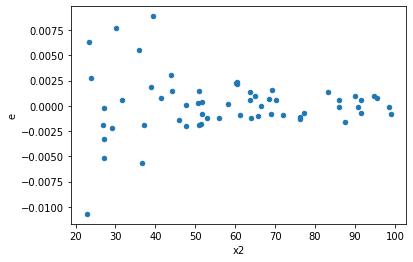

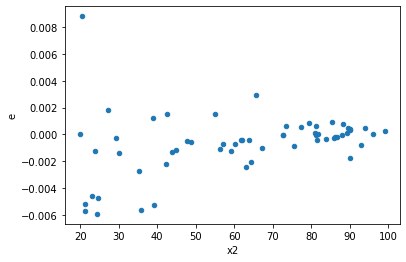

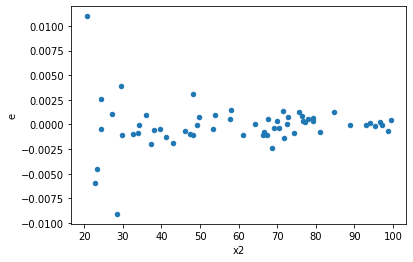

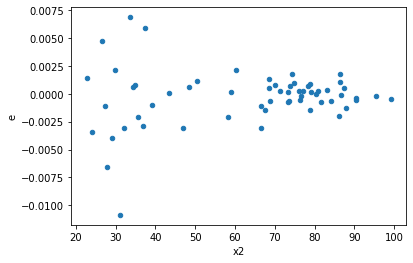

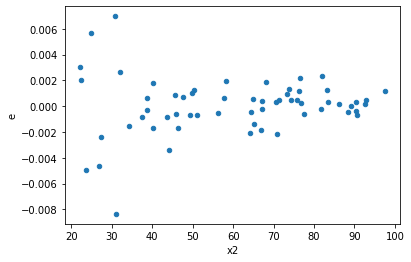

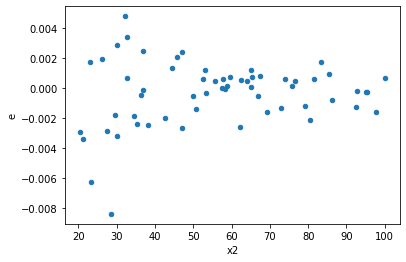

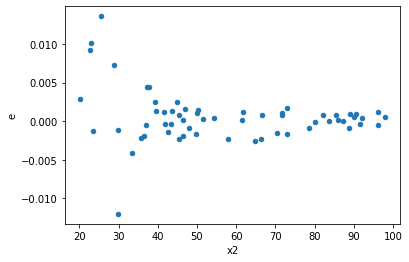

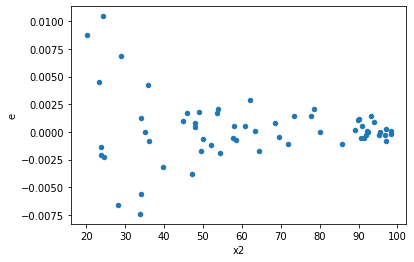

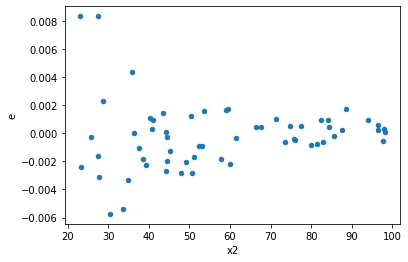

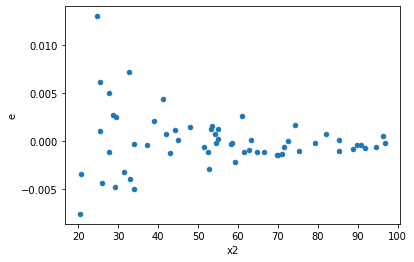

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,21.0,21.0,0.00021379871581658883,0.00024192769716301866,1.0180891229361372e-05,1.1520366531572317e-05,1.131567587948287,0.7796509704497578,0.6101745147751211,0.3898254852248789,Reject005=1 : Homoscedasticity
30.0,21.0,21.0,0.00012971261424678742,0.00013946260664098753,6.176791154608925e-06,6.641076506713692e-06,1.0751661081754937,0.8696687366204547,0.5651656316897726,0.43483436831022737,Reject005=1 : Homoscedasticity
44.0,21.0,21.0,0.00013314022800300313,0.000161850649395187,6.340010857285864e-06,7.70717378072319e-06,1.215640470373359,0.658646138768554,0.670676930615723,0.329323069384277,Reject005=1 : Homoscedasticity
80.0,21.0,21.0,5.887712308034279e-05,8.539081553304689e-05,2.803672527635371e-06,4.066229311097471e-06,1.450322486316526,0.40123644027843675,0.7993817798607816,0.20061822013921837,Reject005=1 : Homoscedasticity
81.0,21.0,21.0,0.0001105458590739654,0.00012111057848292582,5.264088527331686e-06,5.767170403948849e-06,1.095568658088691,0.8363030767888635,0.5818484616055682,0.41815153839443175,Reject005=1 : Homoscedasticity
101.0,21.0,21.0,8.394865127655209e-05,0.0001102223286173521,3.997554822692956e-06,5.248682315112005e-06,1.312973191841363,0.5381672124289416,0.7309163937855292,0.2690836062144708,Reject005=1 : Homoscedasticity
113.0,21.0,21.0,4.387519847844387e-05,5.5669208442118965e-05,2.0892951656401843e-06,2.650914687719951e-06,1.2688081278873202,0.5902835379235318,0.7048582310382341,0.2951417689617659,Reject005=1 : Homoscedasticity
119.0,21.0,21.0,0.00017362679652197343,0.00022884665182570807,8.267942691522544e-06,1.0897459610748004e-05,1.3180376324961238,0.5324546362777125,0.7337726818611437,0.26622731813885625,Reject005=1 : Homoscedasticity
228.0,21.0,21.0,0.00012393957053519176,0.00014818479463448193,5.901884311199607e-06,7.056418792118187e-06,1.1956213338048152,0.6860162847576732,0.6569918576211634,0.3430081423788366,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.0003762419684287045,2.087963110117804e-05,1.791628421089069e-05,9.942681476751447e-07,0.05549522077076469,8.376404363111692e-09,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,0.00017730046723219057,3.946505623259341e-05,8.442879392009075e-06,1.8792883920282578e-06,0.22258856306853636,0.0011097589464337762,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,0.00030409467580615,2.0196523666794916e-05,1.4480698847911905e-05,9.617392222283294e-07,0.06641524917611354,4.537655870212082e-08,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,0.00021379871581658883,0.00024192769716301866,1.0180891229361372e-05,1.1520366531572317e-05,1.131567587948287,0.7796509704497578,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,0.0002755680540258349,1.7105583265238882e-05,1.3122288286944519e-05,8.145515840589944e-07,0.06207389795493207,2.4120412434787034e-08,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,0.00024257795474450097,3.726677563676585e-05,1.155133117830957e-05,1.7746083636555168e-06,0.15362803959666355,6.781834190783838e-05,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,0.00011071824167488599,3.3238391247170034e-05,5.272297222613618e-06,1.5827805355795255e-06,0.3002070006202911,0.008066396346958127,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,0.0001107312547876528,2.3149932563730175e-05,5.272916894650134e-06,1.1023777411300084e-06,0.20906412203243208,0.0007088679381045604,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,0.00031839488980516255,1.7256701569262397e-05,1.5161661419293455e-05,8.217476937743999e-07,0.05419905319404593,6.69084590738226e-09,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    795
Reject005=1 : Homoscedasticity      205
Name: Result_test, dtype: int64